Este cuaderno analizará el comportamiento de la matrícula de ETP desde el año escolar 2012-2013 hasta el 2022-2023[texto del enlace](https://)

In [10]:
#Importo las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from google.colab import drive
import os


In [8]:
# Procedo a importar los archivos de datos de Excel en un dataframe único
# (ETP_2012-2013.xlsx
# ETP_2013-2014.xlsx
# ETP_2014-2015.xlsx
# ETP_2015-2016.xlsx
# ETP_2016-2017.xlsx
# ETP_2017-2018.xlsx
# ETP_2018-2019.xlsx
# ETP_2019-2020.xlsx
# ETP_2020-2021.xlsx
# ETP_2021-2022.xlsx
# ETP_2022-2023.xlsx)
# a partir de la ruta siguiente "Mi Unidad/RD_ETP_Matricula_2012-2022/"

# Mount your Google Drive
drive.mount('/content/drive')

# Change directory to the folder containing the data files
%cd /content/drive/My Drive/RD_ETP_Matricula_2012-2022/

# Create an empty list to store the dataframes
dataframes = []

# Loop through the years and read each Excel file into a dataframe
for year in range(2012, 2023):
  filename = f'ETP_{year}-{year+1}.xlsx'
  df = pd.read_excel(filename)
  dataframes.append(df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(dataframes)

# Print the dataframe
df.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/RD_ETP_Matricula_2012-2022
<class 'pandas.core.frame.DataFrame'>
Index: 718508 entries, 0 to 88811
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AñoEscolar                    718508 non-null  object 
 1   DirecciónRegional             718508 non-null  object 
 2   DistritoEducativo             718508 non-null  object 
 3   Provincia                     718508 non-null  object 
 4   Municipio                     718508 non-null  object 
 5   PlantelEscolar                718508 non-null  object 
 6   Centro                        718508 non-null  object 
 7   Sector                        718508 non-null  object 
 8   Nivel                         718508 non-null  object 
 9   Sector o Familia profesional  718508 non-null  obj

Ahora con las tablas integradas en un solo dataframe procedemos a obtener información.

In [24]:
mat_by_year = df.groupby('AñoEscolar')['Id'].count().reset_index(name='Cantidad')
mat_by_year

,AñoEscolar,Cantidad
0,2012-2013,43467
1,2013-2014,42373
2,2014-2015,43744
3,2015-2016,44385
4,2016-2017,44132
5,2017-2018,68121
6,2018-2019,77133
7,2019-2020,84380
8,2020-2021,92382
9,2021-2022,89579


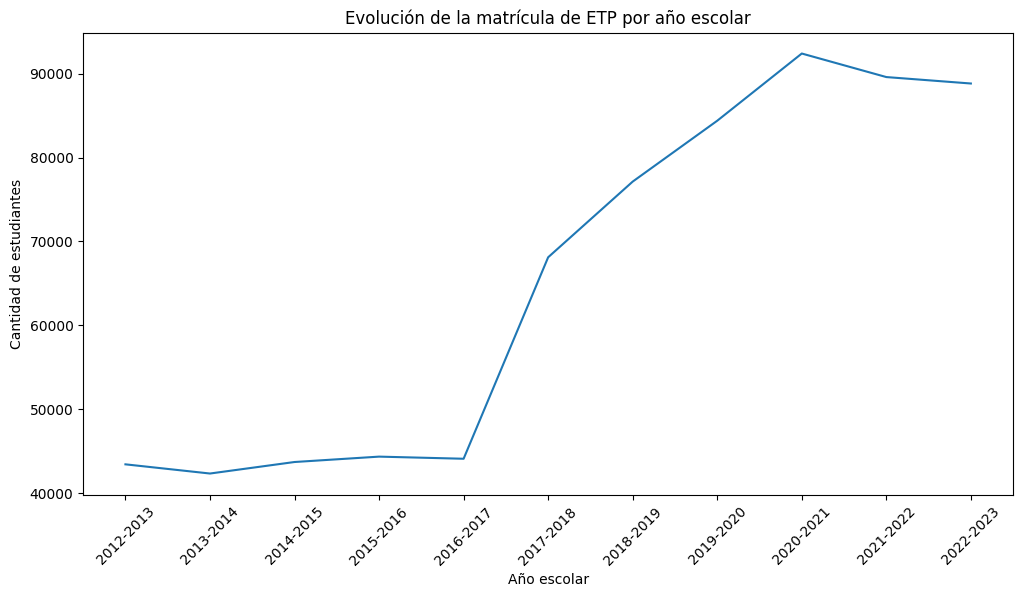

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.lineplot(data=mat_by_year, x="AñoEscolar", y="Cantidad")

plt.title("Evolución de la matrícula de ETP por año escolar")
plt.xlabel("Año escolar")
plt.ylabel("Cantidad de estudiantes")

plt.xticks(rotation=45)

plt.show()


Ahora, basados en estos datos realizaremos una proyección al año esolar 2027-2028

In [34]:
mat_by_year['año_base'] = mat_by_year['AñoEscolar'].str[:4]

In [36]:
import statsmodels.api as sm

# Create a new dataframe with the year_base as the index
mat_by_year_indexed = mat_by_year.set_index('año_base')

# Convert the index to integers for regression
mat_by_year_indexed.index = mat_by_year_indexed.index.astype(int)

# Fit a linear regression model to the data
model = sm.OLS(mat_by_year_indexed['Cantidad'], sm.add_constant(mat_by_year_indexed.index)).fit()

# Create a new dataframe with the projected year_base values
projected_years = pd.DataFrame({'año_base': [2023, 2024, 2025, 2027]}) # Use integers here

# Predict the number of students for each projected year
projected_mat = model.predict(sm.add_constant(projected_years['año_base']))

# Add the projected number of students to the dataframe
projected_years['Cantidad'] = projected_mat

# Print the dataframe
projected_years


,año_base,Cantidad
0,2023,102107.309091
1,2024,108238.709091
2,2025,114370.109091
3,2027,126632.909091


<ipython-input-39-aaa9654f8d0c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:,.0f}' for x in plt.gca().get_yticks()])


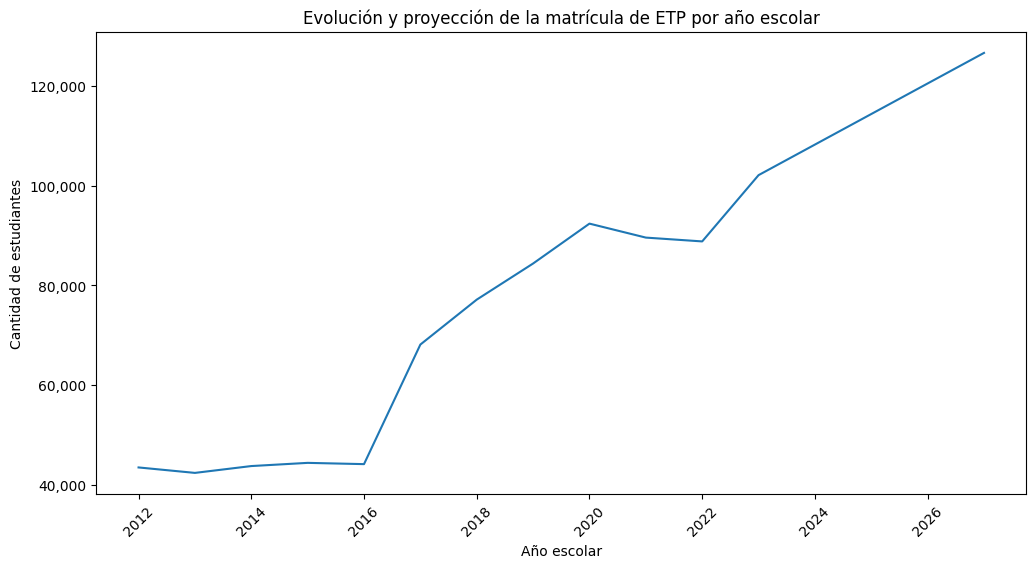

In [39]:
# Combine the dataframes
combined_df = pd.concat([mat_by_year, projected_years]).reset_index(drop=True)

# Convert 'año_base' to integers before sorting
combined_df['año_base'] = combined_df['año_base'].astype(int)

# Sort by year_base
combined_df = combined_df.sort_values('año_base')

# Plot the combined dataframe
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x="año_base", y="Cantidad")

# Format the y-axis to show integers only
plt.gca().set_yticklabels([f'{x:,.0f}' for x in plt.gca().get_yticks()])

# Add title, labels, and rotate x-axis labels
plt.title("Evolución y proyección de la matrícula de ETP por año escolar")
plt.xlabel("Año escolar")
plt.ylabel("Cantidad de estudiantes")
plt.xticks(rotation=45)

plt.show()


In [40]:
combined_df

,AñoEscolar,Cantidad,AñoEscolarNum,año_base
0,2012-2013,43467.000000,2012.0,2012
1,2013-2014,42373.000000,2013.0,2013
2,2014-2015,43744.000000,2014.0,2014
3,2015-2016,44385.000000,2015.0,2015
4,2016-2017,44132.000000,2016.0,2016
5,2017-2018,68121.000000,2017.0,2017
6,2018-2019,77133.000000,2018.0,2018
7,2019-2020,84380.000000,2019.0,2019
8,2020-2021,92382.000000,2020.0,2020
9,2021-2022,89579.000000,2021.0,2021
